In [ ]:
import os

# Replace with your actual username (if on Windows)
os.environ['KAGGLE_USERNAME'] = 'joashmuganda'

# Download the dataset
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification


Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 88% 57.0M/64.4M [00:01<00:00, 40.6MB/s]
100% 64.4M/64.4M [00:01<00:00, 44.5MB/s]


In [ ]:
!unzip cats-and-dogs-image-classification.zip


Archive:  cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281.jpg   
 

In [ ]:
!pip install transformers torch torchvision




  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch


In [ ]:
import os

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Define directories
cat_dir = '/content/test/cats'
dog_dir = '/content/test/dogs'

# List images in directories
cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir)]

# Combine all images for processing
all_images = cat_images + dog_images

# Text descriptions for zero-shot classification
texts = ['a photo of a cat', 'a photo of a dog']


In [ ]:
for image_path in all_images:
    image = Image.open(image_path)
    inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)
    predicted_label = texts[probs.argmax()]
    print(f"Predicted label for {os.path.basename(image_path)}: {predicted_label}")


Predicted label for cat_342.jpg: a photo of a cat
Predicted label for cat_523.jpg: a photo of a cat
Predicted label for cat_109.jpg: a photo of a cat
Predicted label for cat_281.jpg: a photo of a cat
Predicted label for cat_251.jpg: a photo of a cat
Predicted label for cat_162.jpg: a photo of a cat
Predicted label for cat_158.jpg: a photo of a cat
Predicted label for cat_306.jpg: a photo of a cat
Predicted label for cat_358.jpg: a photo of a cat
Predicted label for cat_290.jpg: a photo of a cat
Predicted label for cat_551.jpg: a photo of a cat
Predicted label for cat_595.jpg: a photo of a cat
Predicted label for cat_18.jpg: a photo of a cat
Predicted label for cat_430.jpg: a photo of a cat
Predicted label for cat_244.jpg: a photo of a cat
Predicted label for cat_114.jpg: a photo of a cat
Predicted label for cat_564.jpg: a photo of a cat
Predicted label for cat_422.jpg: a photo of a cat
Predicted label for cat_504.jpg: a photo of a cat
Predicted label for cat_156.jpg: a photo of a cat
P

In [ ]:
cat_dir = '/content/test/cats'
cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]

# Limit the number of images for demonstration purposes
selected_images = cat_images[:10]  # Adjust the number as needed

# Text descriptions for zero-shot classification
texts = ['a photo of a cat', 'a photo of a dog']


In [ ]:
import matplotlib.pyplot as plt

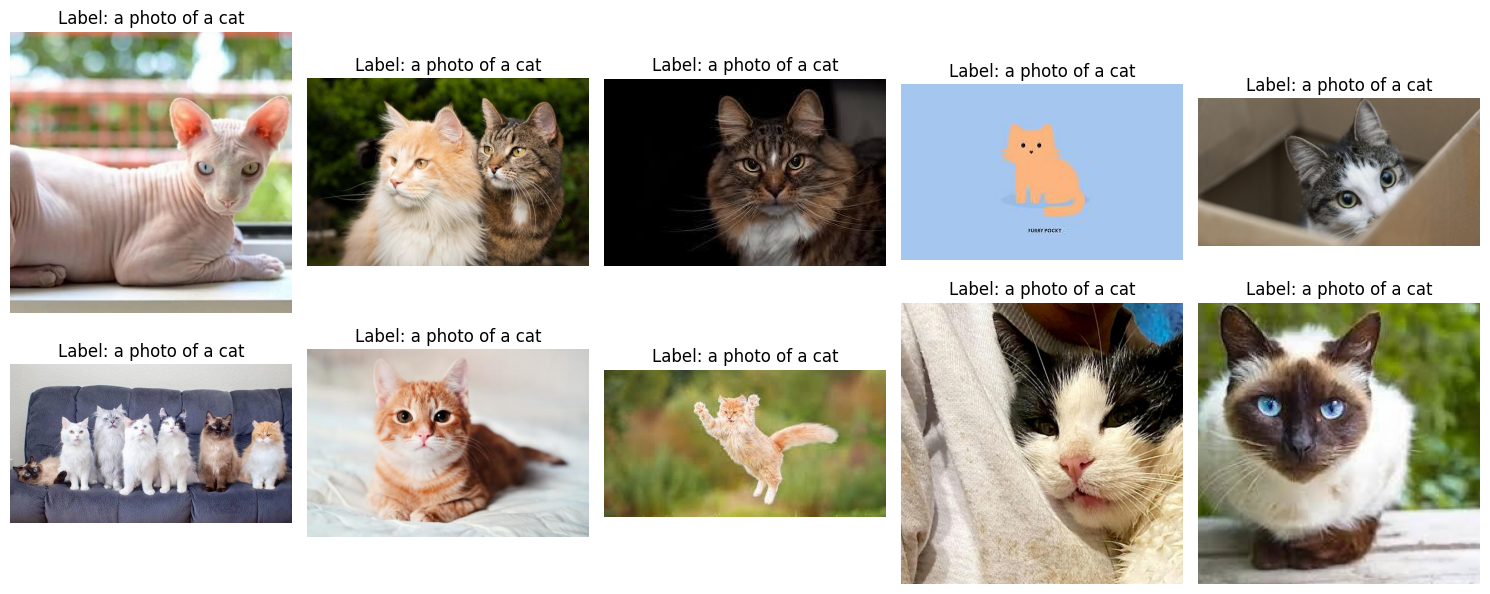

In [ ]:
# Set up the plot
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust layout based on the number of images
axs = axs.flatten()

for i, image_path in enumerate(selected_images):
    image = Image.open(image_path)
    inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)
    predicted_label = texts[probs.argmax()]

    # Display the image and label
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"Label: {predicted_label}")

plt.tight_layout()
plt.show()
